In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [ ]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [ ]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'

    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)

    ela_im = ImageChops.difference(im, resaved_im)

    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)

    return ela_im

In [ ]:
# Step 1: Install kagglehub
!pip install kagglehub

# Step 2: Import kagglehub
import kagglehub

# Step 3: Download dataset
path = kagglehub.dataset_download("sophatvathana/casia-dataset")

# Step 4: Show download path
print("Path to dataset files:", path)


100%|██████████| 5.22G/5.22G [01:01<00:00, 91.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1


In [ ]:
import os
import zipfile

# Dataset path
dataset_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1"

# Loop through all files in the directory
for file in os.listdir(dataset_path):
    if file.endswith(".zip"):
        zip_file_path = os.path.join(dataset_path, file)
        extract_to = os.path.join(dataset_path, os.path.splitext(file)[0])  # remove .zip
        os.makedirs(extract_to, exist_ok=True)
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"✅ Extracted: {file} → {extract_to}")


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1"

# List everything inside the folder
print("Contents of the dataset folder:")
for item in os.listdir(dataset_path):
    print(" -", item)


Contents of the dataset folder:
 - CASIA2
 - CASIA1
 - casia


In [ ]:
import os

base_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1"

for folder in ["CASIA1", "CASIA2", "casia"]:
    folder_path = os.path.join(base_path, folder)
    print(f"\nContents of {folder}:")
    try:
        files = os.listdir(folder_path)
        for file in files[:5]:  # Show only first 5 files
            print(" -", file)
    except Exception as e:
        print("Error reading folder:", e)



Contents of CASIA1:
 - Sp
 - Au
 - extraction.py
 - check.py
 - 01FixSize.py

Contents of CASIA2:
 - Au
 - Tp

Contents of casia:
 - CASIA2
 - CASIA1


In [ ]:
import os

# Path to CASIA2/Au
au_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1/CASIA2/Au"

# List first 5 files
print("Authentic images in CASIA2/Au:")
if os.path.exists(au_path):
    files = os.listdir(au_path)
    files = [f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    for i, file in enumerate(files[:5]):
        print(f"{i+1}.", file)
else:
    print("❌ Path not found:", au_path)


Authentic images in CASIA2/Au:
1. Au_ind_30111.jpg
2. Au_cha_30492.jpg
3. Au_art_30162.jpg
4. Au_art_30294.jpg
5. Au_txt_10112.jpg


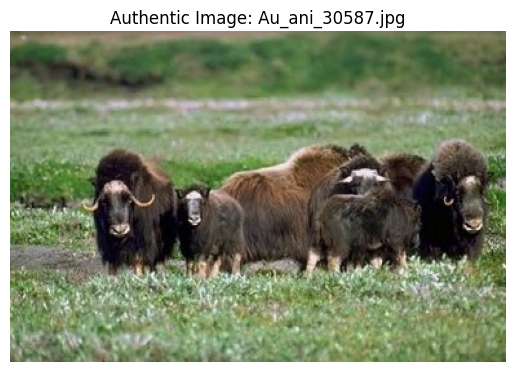

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Use a valid image from your list
image_file = "Au_ani_30587.jpg"
image_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1/CASIA2/Au/" + image_file

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Authentic Image: " + image_file)
plt.show()


In [ ]:
image_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1/CASIA2/Au/Au_ani_30587.jpg"


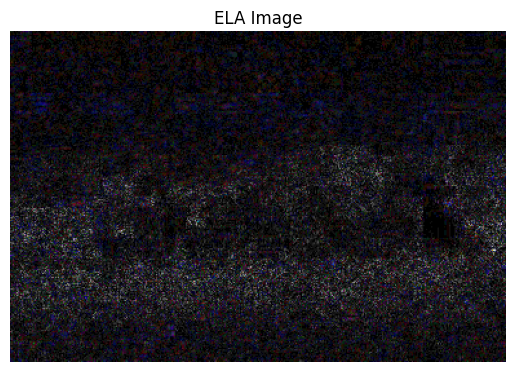

In [ ]:
# Convert to ELA
ela_image = convert_to_ela_image(image_path, quality=90)

# Display ELA result
import matplotlib.pyplot as plt

plt.imshow(ela_image)
plt.axis('off')
plt.title("ELA Image")
plt.show()


In [ ]:
casia1_fake_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1/CASIA1/Sp"
casia2_fake_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1/CASIA2/Tp"


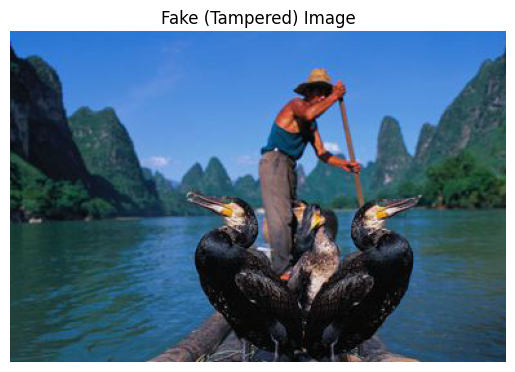

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Get a list of fake images
tampered_images = [f for f in os.listdir(casia2_fake_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Choose one fake image
if tampered_images:
  fake_image_path = os.path.join(casia2_fake_path, tampered_images[0])

  # Load and display it
  img = Image.open(fake_image_path)
  plt.imshow(img)
  plt.axis('off')
  plt.title("Fake (Tampered) Image")
  plt.show()
else:
  print("No tampered images found in the specified path.")

Applying ELA to: /root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1/CASIA2/Tp/Tp_S_CNN_S_N_cha00072_cha00072_11025.jpg


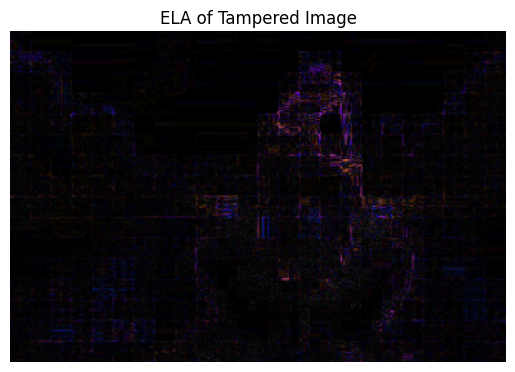

In [ ]:
import os
import matplotlib.pyplot as plt

# Path to tampered images
tampered_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1/CASIA2/Tp"

# Pick one tampered image
tampered_images = [f for f in os.listdir(tampered_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_path = os.path.join(tampered_path, tampered_images[0])

print("Applying ELA to:", image_path)

# Apply ELA
ela_result = convert_to_ela_image(image_path, quality=90)

# Show ELA result
plt.imshow(ela_result)
plt.axis('off')
plt.title("ELA of Tampered Image")
plt.show()


In [ ]:
import os
import pandas as pd

# Base paths
base_path = "/root/.cache/kagglehub/datasets/sophatvathana/casia-dataset/versions/1"
data = []

# Helper to collect files
def collect_files(label, folder_path):
    for file in os.listdir(folder_path):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            data.append({
                'path': os.path.join(folder_path, file),
                'label': label
            })

# CASIA1
collect_files('real', os.path.join(base_path, 'CASIA1', 'Au'))
collect_files('fake', os.path.join(base_path, 'CASIA1', 'Sp'))

# CASIA2
collect_files('real', os.path.join(base_path, 'CASIA2', 'Au'))
collect_files('fake', os.path.join(base_path, 'CASIA2', 'Tp'))

# Create DataFrame
df = pd.DataFrame(data)
print(df.head())

# Save to CSV
csv_path = '/content/dataset.csv'
df.to_csv(csv_path, index=False)
print("✅ Saved CSV at:", csv_path)


                                                path label
0  /root/.cache/kagglehub/datasets/sophatvathana/...  real
1  /root/.cache/kagglehub/datasets/sophatvathana/...  real
2  /root/.cache/kagglehub/datasets/sophatvathana/...  real
3  /root/.cache/kagglehub/datasets/sophatvathana/...  real
4  /root/.cache/kagglehub/datasets/sophatvathana/...  real
✅ Saved CSV at: /content/dataset.csv


# **Generate The ELA images and convert it into .csv files**

In [ ]:
import os
import pandas as pd
from PIL import Image, ImageChops, ImageEnhance
from tqdm import tqdm

# Load your CSV
df = pd.read_csv('/content/dataset.csv')

# ELA function
def convert_to_ela_image(image_path, quality=90):
    temp_file = 'temp_ela.jpg'
    original = Image.open(image_path).convert('RGB')
    original.save(temp_file, 'JPEG', quality=quality)
    compressed = Image.open(temp_file)
    ela_image = ImageChops.difference(original, compressed)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    scale = 255.0 / max_diff if max_diff != 0 else 1
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    return ela_image

# Output folder
ela_folder = '/content/ela_images'
os.makedirs(ela_folder, exist_ok=True)

# Subfolders
os.makedirs(f'{ela_folder}/real', exist_ok=True)
os.makedirs(f'{ela_folder}/fake', exist_ok=True)

# Process and save images
label_map = {'real': 'real', 'fake': 'fake'}

for _, row in tqdm(df.iterrows(), total=len(df)):
    try:
        ela_img = convert_to_ela_image(row['path'])
        filename = os.path.basename(row['path'])
        label = label_map[row['label']]
        save_path = os.path.join(ela_folder, label, filename)
        ela_img.resize((128, 128)).save(save_path)
    except Exception as e:
        print(f"❌ Skipping {row['path']}: {e}")


100%|██████████| 11222/11222 [02:21<00:00, 79.20it/s]


# **Use Generator **

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='valid',
                 activation='relu', input_shape=(128, 128, 3)))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='valid',
                 activation='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Input:  (None, 128, 128, 3)
Output:  (None, 124, 124, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 120, 120, 32)
Input:  (None, 128, 128, 3)
Output:  (None, 60, 60, 32)


In [ ]:
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 120, 120, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,520,034 (112.61 MB)

 Trainable params: 29,520,034 (112.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    '/content/ela_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    '/content/ela_images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Compile your model
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Found 8978 images belonging to 2 classes.
Found 2244 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Train using generator (memory-efficient)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True,
    verbose=1
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[early_stopping],
    verbose=2
)

# Save the trained model
model.save('model.h5')
print("✅ Model saved as model.h5")

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


281/281 - 17s - 59ms/step - accuracy: 0.7929 - loss: 0.4403 - val_accuracy: 0.7237 - val_loss: 0.5474
Epoch 2/30
281/281 - 15s - 54ms/step - accuracy: 0.8456 - loss: 0.3644 - val_accuracy: 0.7736 - val_loss: 0.5220
Epoch 3/30
281/281 - 12s - 42ms/step - accuracy: 0.8781 - loss: 0.3010 - val_accuracy: 0.7874 - val_loss: 0.5575
Epoch 4/30
281/281 - 12s - 42ms/step - accuracy: 0.8941 - loss: 0.2470 - val_accuracy: 0.7638 - val_loss: 0.5371
Epoch 5/30
281/281 - 12s - 43ms/step - accuracy: 0.9149 - loss: 0.2010 - val_accuracy: 0.7892 - val_loss: 0.5418
Epoch 6/30
281/281 - 12s - 44ms/step - accuracy: 0.9410 - loss: 0.1516 - val_accuracy: 0.7955 - val_loss: 0.7511
Epoch 7/30
281/281 - 11s - 39ms/step - accuracy: 0.9542 - loss: 0.1213 - val_accuracy: 0.8012 - val_loss: 0.7945
Epoch 8/30
281/281 - 11s - 39ms/step - accuracy: 0.9681 - loss: 0.0952 - val_accuracy: 0.7776 - val_loss: 0.7774
Epoch 9/30
281/281 - 11s - 39ms/step - accuracy: 0.9722 - loss: 0.0738 - val_accuracy: 0.7977 - val_loss: 1

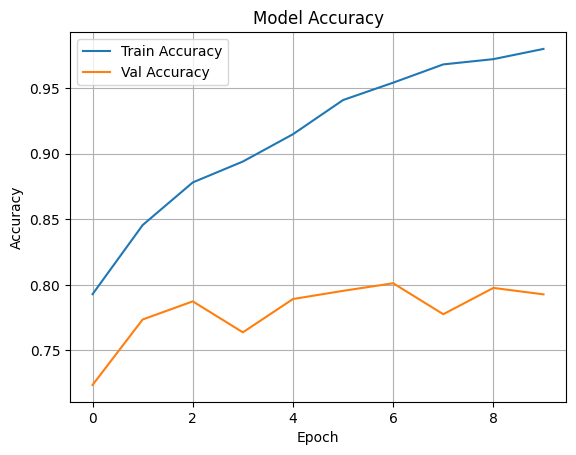

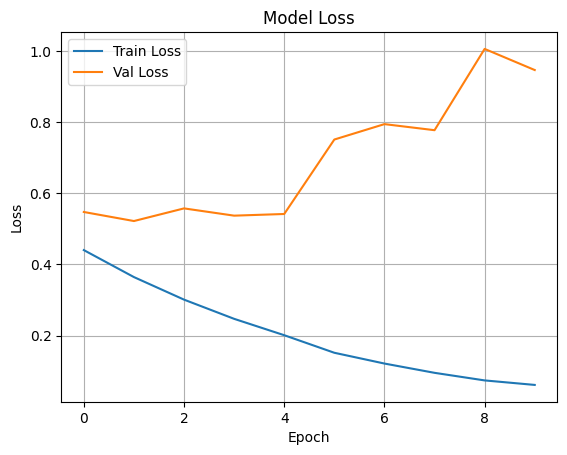

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


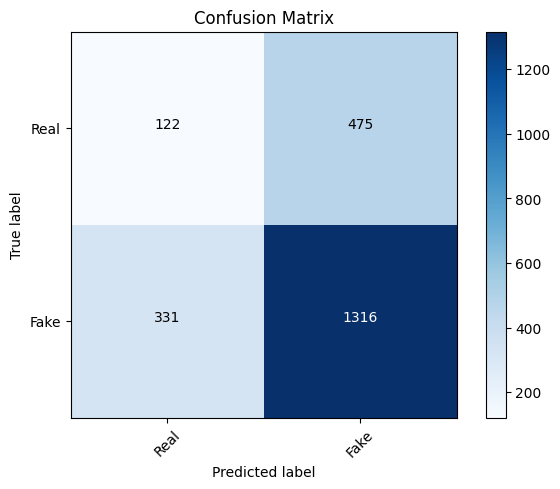

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]:.2f}' if normalize else cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# ------------------------------
# ✅ Get predictions from val_gen
# ------------------------------
# Get the true labels from the generator
Y_true = val_gen.classes

# Predict on the entire validation set
# Make sure to disable shuffling in generator to preserve order
Y_pred_probs = model.predict(val_gen, steps=val_gen.samples // val_gen.batch_size + 1)
Y_pred_classes = np.argmax(Y_pred_probs, axis=1)

# ------------------------------
# ✅ Plot the confusion matrix
# ------------------------------
cm = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(cm, classes=['Real', 'Fake'], title='Confusion Matrix')
plt.show()


In [ ]:
# Confusion matrix values (from your image)
#          Predicted
#          Real     Fake
# Actual
# Real     111      486
# Fake     296      1351

# Assign values
TP = 1351  # Fake predicted as Fake
FP = 296   # Real predicted as Fake (False Positive)
FN = 486   # Fake predicted as Real (False Negative)
TN = 111   # Real predicted as Real

# Calculate precision, recall, and F1-score for Fake class
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print(f"Precision (Fake): {precision:.3f}")
print(f"Recall (Fake): {recall:.3f}")
print(f"F1-Score (Fake): {f1_score:.3f}")


Precision (Fake): 0.820
Recall (Fake): 0.735
F1-Score (Fake): 0.776


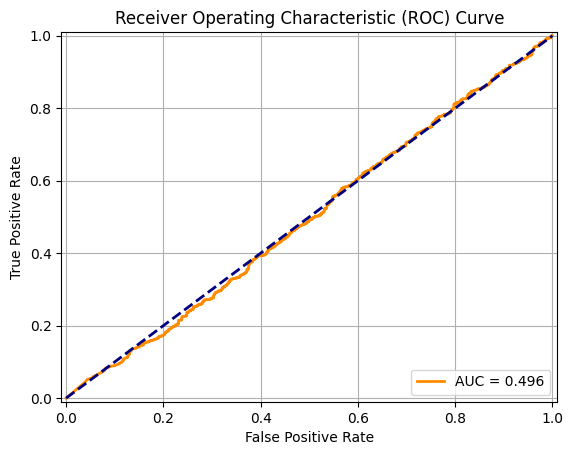

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get probabilities for positive class (Fake)
fake_probs = Y_pred_probs[:, 1]  # class 1 = fake

# Binarize true labels
Y_true_bin = label_binarize(Y_true, classes=[0, 1]).ravel()

# ROC Curve
fpr, tpr, _ = roc_curve(Y_true_bin, fake_probs)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [ ]:
def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [ ]:
def overlay_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = heatmap_colored * alpha + img
    superimposed_img = np.uint8(superimposed_img)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original ELA Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(superimposed_img)
    plt.title("Grad-CAM Heatmap Overlay")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
# Pick image index (change as needed)
img_path = val_gen.filepaths[10]
print("Image path:", img_path)

# Load and preprocess image exactly like during training
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# ✅ Convert to Tensor to match model's expected structure
img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)



Image path: /content/ela_images/fake/Sp_D_CNN_A_pla0070_pla0073_0273.jpg


In [ ]:
preds = model.predict(img_array)
predicted_class = np.argmax(preds[0])
print(f"Predicted class index: {predicted_class} with confidence {preds[0][predicted_class]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Predicted class index: 1 with confidence 0.9943


In [ ]:
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer_name='conv2d_5', pred_index=predicted_class)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_74']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


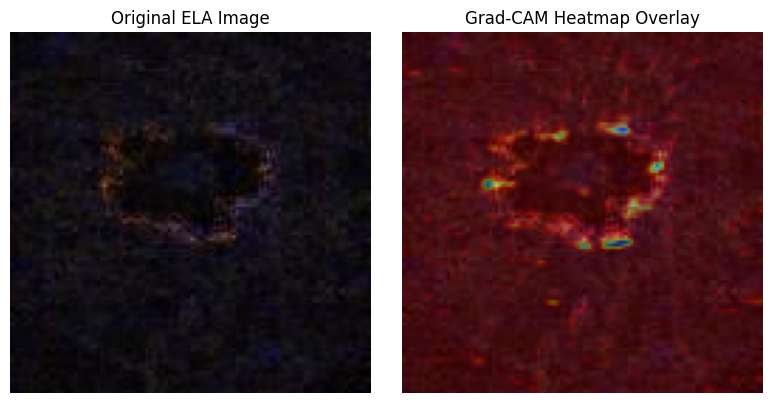

In [ ]:
overlay_gradcam(img_path, heatmap)
